   longitude   latitude  clc_quartier  clc_secteur  haut_tot  haut_tronc  \
0   3.293264  49.840500           7.0        112.0       6.0         2.0   
1   3.273380  49.861409           8.0        228.0      13.0         1.0   
2   3.289068  49.844513           7.0        166.0      12.0         3.0   
3   3.302387  49.861778           6.0        225.0      16.0         3.0   
4   3.304047  49.858446           6.0          4.0       5.0         2.0   

   tronc_diam  fk_arb_etat  fk_stadedev  fk_port  fk_pied  fk_situation  \
0        37.0          1.0          1.0      8.0      4.0           0.0   
1       160.0          1.0          0.0      8.0      4.0           1.0   
2       116.0          4.0          0.0      8.0      4.0           0.0   
3       150.0          1.0          0.0      8.0      4.0           1.0   
4       170.0          2.0          0.0      6.0      4.0           2.0   

   fk_revetement  age_estim  fk_prec_estim  clc_nbr_diag  fk_nomtech  villeca  \
0          

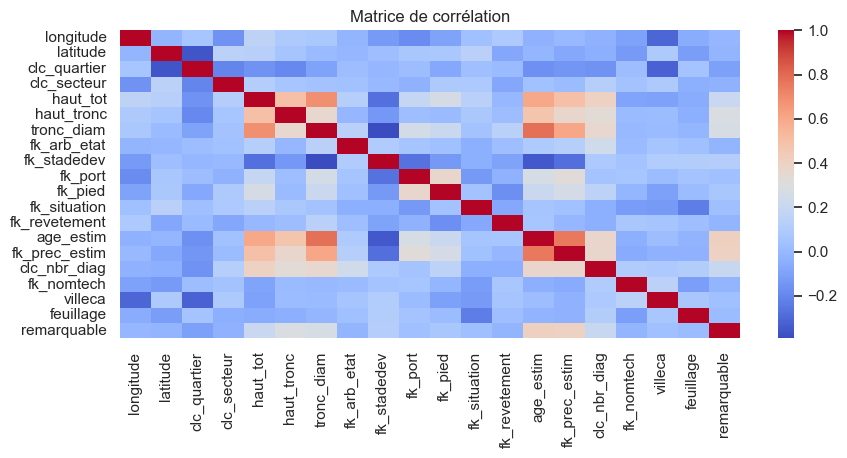

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

file_path = "Data_Arbre.csv"
df = pd.read_csv(file_path)
df_enc = df.copy()
colonnes_a_encoder=["clc_quartier", "clc_secteur", "fk_arb_etat", "fk_stadedev", "fk_port", "fk_pied", "fk_situation", "fk_revetement", "fk_nomtech", "villeca", "feuillage", "remarquable"]
enc_colonne_cate = preprocessing.OrdinalEncoder()
df_enc[colonnes_a_encoder] = enc_colonne_cate.fit_transform(df[colonnes_a_encoder])
print(df_enc.head())



#Définir la taille de la figure
sns.set(rc={'figure.figsize':(10, 4)})
#Calculer la matrice de corrélation
df_corr = df_enc.corr()
#Tracer la heatmap
ax = sns.heatmap(df_corr, xticklabels=df_corr.columns, yticklabels=df_corr.columns, cmap='coolwarm')
#Ajouter un titre
ax.set_title('Matrice de corrélation')
#Afficher la heatmap
plt.show()


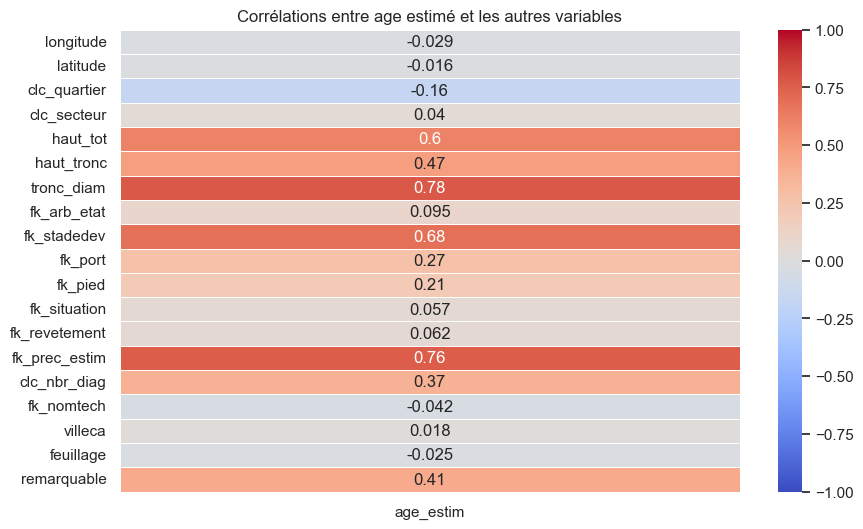

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

file_path = "Data_Arbre.csv"
df = pd.read_csv(file_path)

df_enc = df.copy() #copy du df pour faire l'encodage

colonnes_a_encoder = ["clc_quartier", "clc_secteur", "fk_arb_etat", "fk_stadedev", "fk_port", "fk_pied", "fk_situation", "fk_revetement", "fk_nomtech", "villeca", "feuillage", "remarquable"] #colonnes à encoder


enc_colonne_cate = preprocessing.OrdinalEncoder(categories=[['Jeune', 'Adulte', 'vieux', 'senescent']]) #initialisation encodeur pour "fk_stadedev"

df_enc[['fk_stadedev']] = enc_colonne_cate.fit_transform(df[['fk_stadedev']]) #encodoge pour 'fk_stadedev'

# Encoder les autres colonnes catégorielles
other_columns_to_encode = [col for col in colonnes_a_encoder if col != 'fk_stadedev']
enc_other = preprocessing.OrdinalEncoder()
df_enc[other_columns_to_encode] = enc_other.fit_transform(df[other_columns_to_encode])

#print(df_enc.head())

# Calculer les corrélations entre l'âge estimé et toutes les autres variables
corr_matrix = df_enc.corr()
corr_age_estim = corr_matrix[['age_estim']].drop('age_estim')

sns.set(rc={'figure.figsize': (10, 6)}) #taille heatmap

ax = sns.heatmap(corr_age_estim, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=True, linewidths=.5) #tracer heatmap

ax.set_title('Corrélations entre age estimé et les autres variables')

plt.show()